# Problem 1

A steam line of diameter $D=0.1m$ and length $L=25m$ loses $18.405 \mathrm{kW}$ to the ambient air. The air is at $T_\infty=T_{sur}=25^\circ \mathrm{C}$, the convection coefficient of the air flow is $h=10\mathrm{W}/\mathrm{m}^2.\mathrm{K}$ and the emissivity of the pipe is $\varepsilon=0.8$.
* Draw a sketch
* Write your assumptions
* Draw the thermal circuit of the problem
* Find the surface temperature of the steam line
* Calculate the annual energy loss and the annual cost assuming that the steam is generated by a furnace with an efficiency $\eta_f = 0.9$ running at a cost of natural gas of  $0.02\$/\mathrm{MJ}$.

### Solution
#### Sketch

<img src="Sketch-HW2-SteamPipe.png" alt="my awesome sketch"  width=50%>

#### Assumptions

* 1D Heat transfer
* Steady state

#### Thermal Circuit

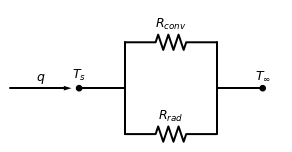

In [1]:
import schemdraw as schem
import schemdraw.elements as e
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc
from Libraries import HT_thermal_resistance as res
# Create Resistance list
R = []
R.append(res.Resistance(name="$R_{conv}$", units="W"))
R.append(res.Resistance(name="$R_{rad}$", units="W"))
## Create a schemdraw drawing
d = schem.Drawing()
d.add(e.DOT, label = "$T_s$")
L0 = d.add(e.LINE, d='right', l=1.5)
d.add(e.Line, d='up', l=1.5)
d.add(e.RES, d='right', label=R[0].name)
d.add(e.LINE, d='down', l= 1.5)
d.add(e.LINE, d='down', l= 1.5, xy=L0.end)
d.add(e.RES, d='right', label=R[1].name)
d.add(e.Line, d='up', l=1.5)
d.add(e.Line, d='right', l=1.5)
d.add(e.DOT, label = "$T_\infty$")
d.add(e.ARROW, toplabel = "$q$", endpts= [[-2.25,0],[-0.25,0]])
d.draw()

### Solution
The thermal circuit above can be reduced to 
$$
q=\frac{1}{R_{tot}}(T_s-T_\infty)
$$
with 
$$
R_{tot}=\left[\frac{1}{R_{conv}}+\frac{1}{R_{rad}}\right]^{-1}
$$
and therefore
$$
T_s=T_\infty+R_{tot}q
$$

The problem is that $R_{rad}$, therefore $R_{tot}$ is a function of $T_s$.

To solve for $T_s$, we use an iterative method conditioned on the absolute difference between two consecutive iterations of $T_s^{(i)}$ obtained from the following steps:

* Step 0: Choose an initial guess $T_s^{(i=0)}$ 
Then perform
* Substep 1: $h_{rad}^{(i)}=\varepsilon\sigma(T_s^{(i)}+T_\infty)((T_s^{(i)})^2+T_\infty^2)$
* Substep 2: 
$$R_{tot}^{(i)}=\left[\frac{1}{R_{conv}}+\frac{1}{R_{rad}^{(i)}}\right]^{-1}$$
* Substep 3: $T_s^{(i+1)}=T_\infty+R_{tot}^{(i)}q$
* Substep 4: $\epsilon_T=\vert T_s^{(i+1)} - T_s^{(i)}\vert$
* Substep 5: $i=i+1$

Repeat substeps 1 to 5 until $\epsilon_T<\epsilon_{th}$


In [2]:
from Libraries import thermodynamics as thermo
D = 0.1 #m
L = 25 #m
A = np.pi*D*L
h = 10 #W/m^2.K
eps = 0.8
T_inf = 25 #C
q = 18.405e3 #W

# Thermal Resistances

R[0].convection(h,A)

Ts = 100 #C initial guess
threshold = 0.1 #C
errorTs = np.inf
iteration = 0
maxiter = 20
while (errorTs > threshold) and (iteration < maxiter):
    iteration += 1
    Ts_old = Ts
    R[1].radiation(eps,thermo.C2K(Ts),thermo.C2K(T_inf),A)
    Rtot = (1/R[0].R + 1/R[1].R)**(-1)
    Ts = T_inf + Rtot*q
    errorTs = np.abs(Ts_old - Ts)
print("absolute error between Ts(i-1) and Ts(i) %.2e, after %i iterations" %(errorTs,iteration))
print("Ts = %.2f C" %(Ts))

absolute error between Ts(i-1) and Ts(i) 8.33e-02, after 6 iterations
Ts = 149.88 C


In [3]:
TotalCostnoins= q*(3600*24*365)/0.9*0.02e-6
print("The total cost is $%.0f"%(TotalCostnoins))

The total cost is $12898


# Problem 2


Assuming that the surface temperature is $150^\circ \mathrm{C}$, calculate the savings using an insulation that would not melt (!).

According to the manufacturer, for a $10\mathrm{cm}\simeq4\mathrm{in}$, the $1/2,1,1.5,2\mathrm{in}$ thick sheets are available at a cost of $\$16.28,18.5,25.72,36.94$ per $3\mathrm{ft}\simeq 1\mathrm{m}$, according to https://www.grainger.com/category/plumbing/insulation/pipe-insulation?attrs=Fits+Pipe+Size+-+Pipe+Insulation%7C4+in&filters=attrs . 

The thermal conductivity is about $k_{ins}= 0.04\mathrm{W/m.K}$

Hint: Derive the heat loss for a variable thickness of insulation, then apply this formula for a range of thicknesses. Compare savings of gas vs cost of insulation.

### Solution
#### Sketch

<img src="hw2_prob2.png" alt="my awesome sketch"  width=40%>

#### Assumptions

* 1D Heat transfer
* Steady state

#### Thermal Circuit

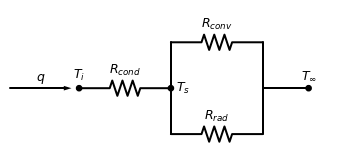

In [4]:
import schemdraw as schem
import schemdraw.elements as e
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc
from Libraries import HT_thermal_resistance as res
# Create Resistance list
R = []
R.append(res.Resistance(name="$R_{cond}$", units="W"))
R.append(res.Resistance(name="$R_{conv}$", units="W"))
R.append(res.Resistance(name="$R_{rad}$", units="W"))

# create schemdraw drawing
d = schem.Drawing()
d.add(e.DOT, label='$T_i$')
res1 = d.add(e.RES, d='right', label=R[0].name)
d.add(e.DOT, rgtlabel='$T_{s}$')
d.add(e.LINE, d='up', l=1.5)
d.add(e.RES, d='right', label=R[1].name)
d.add(e.LINE, d='down', l=1.5)
d.add(e.LINE, d='down', l=1.5, xy=res1.end)
d.add(e.RES, d='right', label=R[2].name)
d.add(e.LINE, d='up', l=1.5)
d.add(e.LINE, d='right', l=1.5)
d.add(e.DOT, label='$T_{\infty}$')
d.add(e.ARROW, toplabel="$q$", endpts=[[-2.25,0],[-0.25,0]])

d.draw()

#### Heat transfer analysis

*Where you derive the necessary equations to solve this problem*


In [5]:
from Libraries import thermodynamics as thermo
import numpy as np

r_i = 0.05 #m
L = 25 #m
k = 0.04 #W/m.K
eps = 0.8
T_i = 150 #C
T_inf = 25 #C
h = 10 # W/mK
# q = 18.405e3 # W



Nthicknesses = 4 #number of thicknesses investigated
r_o_array = (np.array([0.5, 1., 1.5, 2.])*0.0254)+r_i #m
q_per_thickness = np.zeros((Nthicknesses))
T_s_array = np.zeros((Nthicknesses))

T_s_list = []
q_list = []
thicknesses = ['0.5in', '1in', '1.5in', '2in']
for ithick in range(Nthicknesses):

    T_s = 100 #C initial guess
    A = np.pi*2*r_o_array[ithick]*L # m^2
    
    # thermal resistances
    r_conduction = (np.log(r_o_array[ithick]/r_i))/(2*np.pi*L*k)
    R[1].convection(h, A)
    
    threshold = 0.1 #C
    errorTs = np.inf
    iteration = 0
    maxiter = 20
    
    while (errorTs > threshold) and (iteration < maxiter):
        iteration += 1
        Ts_old = T_s
        r_o = r_o_array[ithick]
        R[2].radiation(eps, thermo.C2K(T_s), thermo.C2K(T_inf), A)
        Rtot = r_conduction + (1/R[1].R + 1/R[2].R)**(-1)
        q = (1/Rtot)*(T_i - T_inf)
        T_s = T_i - q*r_conduction
        errorTs = np.abs(Ts_old - T_s)
    
    q = (1/r_conduction)*(T_i - T_s)
    q_list.append(q)

q_per_thickness = np.asarray(q_list)  # make list a numpy array

gas_cost = []
for q in q_list:
    cost = q*(3600*24*365)/0.9*0.02e-6
    gas_cost.append(cost)

gas_cost_ins = np.asarray(gas_cost)  # cost of gas with insulation
gas_savings = np.asarray(gas_cost) - 12898  # savings with insulation

cost_array = np.array([16.28, 18.5, 25.72, 36.94])  # cost per thickness
total_cost_per_length = cost_array*L

total_savings = np.add(total_cost_per_length, gas_savings)

print(f"Total savings for 0.5 in.: ${total_savings[0]*-1}")
print(f"Total savings for 1.0 in.: ${total_savings[1]*-1}")
print(f"Total savings for 1.5 in.: ${total_savings[2]*-1}")
print(f"Total savings for 2.0 in.: ${total_savings[3]*-1}")
        

Total savings for 0.5 in.: $10437.477954154128
Total savings for 1.0 in.: $11201.47212587777
Total savings for 1.5 in.: $11332.718350431784
Total savings for 2.0 in.: $11218.145763315764


#### Cost for year one
*Compute and plot*
 


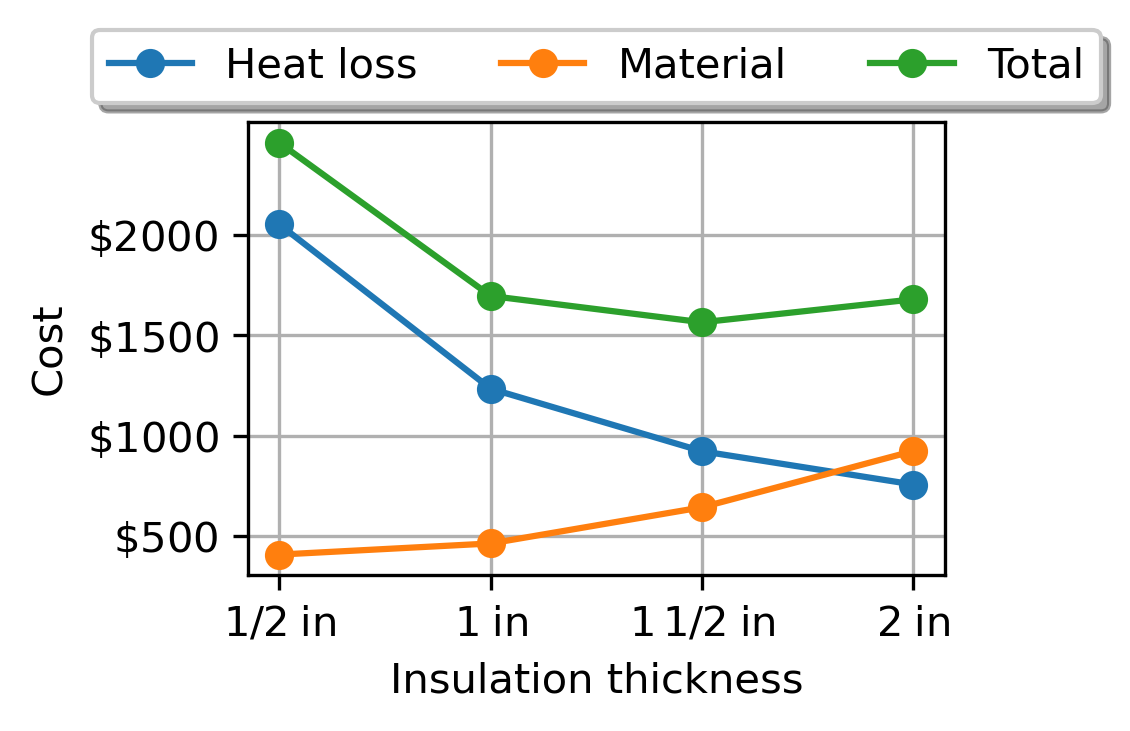

In [6]:
Cost = 0.02*1e-6
etaf = 0.9
oneyearinsec = 365*24*3600
cost_heatloss = q_per_thickness*oneyearinsec/etaf*Cost
cost_per_m = np.array([16.28, 18.5, 25.72, 36.94])
thicknesses = [r"$1/2\;\mathrm{in}$", r"$1\;\mathrm{in}$",r"$1\,1/2\;\mathrm{in}$",r"$2\;\mathrm{in}$" ]
dollars_str = [r"$\$500$", r"$\$1000$", r"$\$1500$", r"$\$2000$"]
dollars_int = np.array([500,1000,1500,2000])
indx = np.arange(Nthicknesses)
plt.figure(figsize=(3,2),dpi=300)
plt.xticks(indx,thicknesses)
plt.yticks(dollars_int,dollars_str)
cost_material = cost_per_m*L
cost_total = cost_heatloss + cost_material

plt.plot(cost_heatloss,'-o',label = "Heat loss")
plt.plot(cost_material,'-o',label = "Material")
plt.plot(cost_total,'-o',label = "Total")
plt.xlabel("Insulation thickness")
plt.ylabel("Cost")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=3, fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Problem 3

A house has a composite wall of plaster board, ($k_p=0.17\mathrm{W}/\mathrm{m}.\mathrm{K}$, $L_p=10\mathrm{mm}$), fiberglass insulation ($k_b=0.038\mathrm{W}/\mathrm{m}.\mathrm{K}$, $L_b=100\mathrm{mm}$) and plywood siding, ($k_s=0.12\mathrm{W}/\mathrm{m}.\mathrm{K}$, $L_s=20\mathrm{mm}$). On a cold winter day, the inside (plaster board side) experiences convection heat transfer ($h_i=60\mathrm{W}/\mathrm{m}^2$, $T_{\infty,i}=20^\circ\mathrm{C}$), and the outside is subjected to ($h_o=30\mathrm{W}/\mathrm{m}^2$, $T_{\infty,o}=-15^\circ\mathrm{C}$). The surface area of the wall is $350\mathrm{m^2}$

* Determine the total heat resistance of the wall (without inside and outside convection)
* Determine the total heat loss through the wall,
* Determine the total heat loss is the wind were to increase $h_o$ to $300\mathrm{W}/\mathrm{m}^2$. What is the percentage increase in the heat loss
* Compare the the total resistance for both situations (including inside and outside convection). What is the controlling resistance that determines the amount of heat loss?

### Solution
#### Sketch

<img src="hw2_prob3.jpg" alt="my awesome sketch"  width=50%>

#### Assumptions

* 1D Heat transfer
* Steady state

#### Thermal Circuit


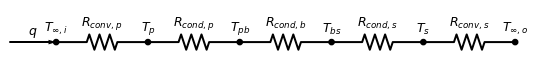

In [7]:
import schemdraw as schem
import schemdraw.elements as e
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc
from Libraries import HT_thermal_resistance as res
# Create Resistance list
R = []
R.append(res.Resistance(name="$R_{cond,p}$", units="W"))
R.append(res.Resistance(name="$R_{cond,b}$", units="W"))
R.append(res.Resistance(name="$R_{cond,s}$", units="W"))
R.append(res.Resistance(name="$R_{conv,p}$", units="W"))
R.append(res.Resistance(name="$R_{conv,s}$", units="W"))
R.append(res.Resistance(name="$R_{conv,p,2}", units="W"))
d = schem.Drawing()
d.add(e.ARROW, d='right', label='$q$', l=1.5)
d.add(e.DOT, label="$T_{\infty,i}$")
d.add(e.RES, d='right', label=R[3].name)
d.add(e.DOT, label="$T_p$")
d.add(e.RES, d='right', label=R[0].name)
d.add(e.DOT, label="$T_{pb}$")
d.add(e.RES, d='right', label=R[1].name)
d.add(e.DOT, label="$T_{bs}$")
d.add(e.RES, d='right', label=R[2].name)
d.add(e.DOT, label="$T_{s}$")
d.add(e.RES, label=R[4].name)
d.add(e.DOT, label="$T_{\infty,o}$")


d.draw()

#### Wall equivalent resistance
*your answer here*


In [8]:
kp = 0.17 #W/m.K
Lp = 10e-3 #m
kb = 0.038
Lb = 100e-3
ks = 0.12
Ls = 20e-3
A = 350 #m^2

# thermal resistances
R[0].cond_plane(kp, Lp, A)
R[1].cond_plane(kb, Lb, A)
R[2].cond_plane(ks, Ls, A)

Rtotwall = (1/R[0].R + 1/R[1].R + 1/R[2].R)**(-1)

print("The total wall resistance is %.2e K/W" %(Rtotwall))

The total wall resistance is 1.22e-04 K/W


#### Convective resistances and total resistance

In [9]:
ho30 = 30 #W/m^2.K
ho300 = 300 #W/m^2.K
hi = 60 #W/m^2.K

R[3].convection(ho30, A)
R[4].convection(hi, A)
R[5].convection(ho300, A)

Rtot30 = (1/R[3].R + 1/R[0].R + 1/R[1].R + 1/R[2].R + 1/R[4].R)**(-1)
Rtot300 = (1/R[5].R + 1/R[0].R + 1/R[1].R + 1/R[2].R + 1/R[4].R)**(-1)

print("The total wall resistance for ho=30 W/m^2.K is %.2e K/W" %(Rtot30))
print("The total wall resistance for ho=300 W/m^2.K is %.2e K/W" %(Rtot300))

The total wall resistance for ho=30 W/m^2.K is 2.52e-05 K/W
The total wall resistance for ho=300 W/m^2.K is 7.45e-06 K/W


### Total heat loss
*Equation here*

In [10]:
Tinfi = 20.
Tinfo = -15
DT = Tinfi - Tinfo

q30 = (1/Rtot30)*DT
q300 = (1/Rtot300)*DT

print("The total heat loss for ho=30 W/m^2.K is %.0f W" %(q30))
print("The total heat loss for ho=300 W/m^2.K is %.0f W" %(q300))

The total heat loss for ho=30 W/m^2.K is 1388905 W
The total heat loss for ho=300 W/m^2.K is 4696405 W


# Problem 4

The goal is to compute the heat loss from a single pane window, a single pane window with storm window and a double paned window under controlled conditions. The inside surface temperature is $T_i=10^\circ\mathrm{C}$ and the outside surface temperature to $T_o=-10^\circ\mathrm{C}$ for a window of height and width $h = 1.2\;\mathrm{m}$ and $w = 0.7\;\mathrm{m}$ with a surface aera $A=h w$. The thickness of a residential window pane is $t_{glass}=3/32\,\mathrm{in}$ (https://ringerwindows.com/thick-glass-windows/) with a thermal conductivity $k=0.96\;\mathrm{W/m.K}$. The storm window has a $1\,\mathrm{in}$.
A double paned window has air trapped at a vacuum of $10^{-3} \mathrm{torr}$ in a gap of $5\mathrm{mm}$. Do not consider the effects of radiation or outside/inside convection for any of the window.

<img src="ThermalCondAir.png" alt="my awesome sketch" width=100% >

Note you will need to use the thermodynamics module to calculate the thermal conductivity of the air trapped in the storm window. We will assume that convection in that gap is negligible (which is not entirely true). You will use the average temperature between $T_i$ and $T_o$ as reference temperature.

### Solution
#### Sketch

<img src="hw2_prob4.jpg" alt="my awesome sketch"  width=50%>
Sketch of a single pane window (a), a storm window (b) and a double pane window with vaccum (c). 

#### Assumptions

* 1D Heat transfer
* Steady state

#### Thermal Circuits
(a) Single pane

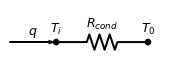

In [11]:
import schemdraw as schem
import schemdraw.elements as e
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc
from Libraries import HT_thermal_resistance as res
Ti = 10 #C
To = -10 #C
DT = Ti - To
k_glass = 0.96 #W/m.K
t_glass = 3./32.*0.0254 #m
h = 1.2 #m
w = 0.7 #m
A = h*w

# Create Resistance list
Rsingle = []
Rsingle.append(res.Resistance(name="$R_{cond}$", units="W"))

d = schem.Drawing()
d.add(e.ARROW, d='right', label='$q$', l=1.5)
d.add(e.DOT, label="$T_i$")
d.add(e.RES, d='right', label=Rsingle[0].name)
d.add(e.DOT, label="$T_{0}$")
d.draw()

In [12]:
# heat loss through single pane

Rsingle[0].cond_plane(k_glass, t_glass, A)

Rtot_single = (1/Rsingle[0].R)**(-1)
q = (1/Rtot_single)*DT
print(f"Heat loss through single pane: {q:.2f} W")

Heat loss through single pane: 6772.91 W


(b) Storm window

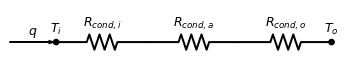

In [13]:
from Libraries import thermodynamics as thermo
Tm = (Ti+To)/2
airstorm = thermo.Fluid('air',Tm,'C')
t_gap_storm = 1*0.0254 #m
Rstorm = []
Rstorm.append(res.Resistance(name="$R_{cond,i}$", units="W"))
Rstorm.append(res.Resistance(name="$R_{cond,a}$", units="W"))
Rstorm.append(res.Resistance(name="$R_{cond,o}$", units="W"))

d=schem.Drawing()
d.add(e.ARROW, d='right', label="$q$", l=1.5)
d.add(e.DOT, label="$T_i$")
d.add(e.RES, label=Rstorm[0].name)
d.add(e.RES, label=Rstorm[1].name)
d.add(e.RES, label=Rstorm[2].name)
d.add(e.DOT, label="$T_o$")
d.draw()

In [14]:
print("The thermal conductivity of air in the gap of the storm window is %.3f W/m^2.K" %(airstorm.k))

The thermal conductivity of air in the gap of the storm window is 0.024 W/m^2.K


In [15]:
R[0].cond_plane(k_glass, t_glass, A)
R[1].cond_plane(airstorm.k, t_gap_storm, A)
R[2].cond_plane(k_glass, t_glass, A)

Rtot_storm = (R[0].R + R[1].R + R[2].R)

q_storm = (1/Rtot_storm)*DT
print(f"Heat loss through storm window: {q_storm:.2f} W")

Heat loss through storm window: 16.00 W


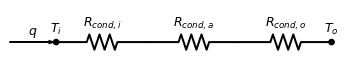

In [16]:
t_gap_vacuum = 0.005#m
k_vacuum = 0.003 #W/m.K (from graph)
Rdouble = []
Rdouble.append(res.Resistance(name="$R_{cond,i}$", units="W"))
Rdouble.append(res.Resistance(name="$R_{cond,a}$", units="W"))
Rdouble.append(res.Resistance(name="$R_{cond,o}$", units="W"))

d=schem.Drawing()
d.add(e.ARROW, d='right', label="$q$", l=1.5)
d.add(e.DOT, label="$T_i$")
d.add(e.RES, label=Rdouble[0].name)
d.add(e.RES, label=Rdouble[1].name)
d.add(e.RES, label=Rdouble[2].name)
d.add(e.DOT, label="$T_o$")
d.draw()

In [17]:
R[0].cond_plane(k_glass, t_glass, A)
R[1].cond_plane(k_vacuum, t_gap_vacuum, A)
R[2].cond_plane(k_glass, t_glass, A)

Rtot_double = (R[0].R + R[1].R + R[2].R)
q_double = (1/Rtot_double)*DT
print(f"Heat loss through vacuum window: {q_double:.2f} W")

Heat loss through vacuum window: 10.05 W
